<a href="https://colab.research.google.com/github/karen-moreiraz/DataScience-1/blob/main/DataScience_2025_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DataScience 1 = Comportamiento de compra**
---


# **1. Descripción del dataset**

Descripción del Dataset: El dataset trata sobre el comportamiento de compra de distintos clientes, desde el producto escogido, hasta el método de pago y envío escogido. Tiene 18 columnas y 3900 filas de datos.

# **2. Importar librerías**

In [1]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
# Configuraciones para visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# **3. Carga de Datos**

In [3]:
#Declaración del Dataframe
df= pd.read_csv("https://raw.githubusercontent.com/karen-moreiraz/DataScience-1/refs/heads/main/shopping_behavior_updated.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
#Descripción del DataFrame-1

# Obtener las dimensiones (filas, columnas)
print("Dimensiones del Dataframe (shape):")
print(df.shape)
print("Columnas del Dataframe:")
df.columns

Dimensiones del Dataframe (shape):
(3900, 18)
Columnas del Dataframe:


Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [5]:
#Descripción del DataFrame-2

print("Tipo de variables:")
df.info()
print("--------------------------------------------------------------------------")
print("Estadística de variables:") #sólo devuelve estarísticas de variables numéricas/ int64 o float64
df.describe()

Tipo de variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used      

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
#Descripción del DataFrame-2

df_string = df.select_dtypes(include='object').columns

# Usamos un ciclo para recorrer cada columna de la lista
for columna in df_string:
    print(f"--- Frecuencia de valores para la columna: '{columna}' ---")
    print(df[columna].value_counts())
    print("-" * 50)  # Agregamos una línea para separar los resultados
    print("\n")

--- Frecuencia de valores para la columna: 'Gender' ---
Gender
Male      2652
Female    1248
Name: count, dtype: int64
--------------------------------------------------


--- Frecuencia de valores para la columna: 'Item Purchased' ---
Item Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64
--------------------------------------------------


--- Frecuencia de valores para la columna: 'Category' ---
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64
-----------------------------------------------

# 3.1 Transformación de datos

In [7]:
# Transformación binaria directa
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Promo Code Used'] = df['Promo Code Used'].map({'No': 0, 'Yes': 1})
df['Discount Applied'] = df['Discount Applied'].map({'No': 0, 'Yes': 1})
df['Subscription Status'] = df['Subscription Status'].map({'No': 0, 'Yes': 1})

In [8]:
df[['Gender', 'Promo Code Used', 'Discount Applied', 'Subscription Status']].head()

,Gender,Promo Code Used,Discount Applied,Subscription Status
0,0,1,1,1
1,0,1,1,1
2,0,1,1,1
3,0,1,1,1
4,0,1,1,1


# **4. Hipótesis**

Hipótesis Nula (H₀):
Las características demográficas y de comportamiento de compra (edad, género, categoría, monto de compra, frecuencia de compra, uso de descuentos, tipo de envío, método de pago, etc.) no permiten predecir si un cliente hará uso de un código promocional con una precisión significativamente mejor que el azar.

Hipótesis Alternativa (H₁):
Es posible construir un modelo de clasificación (por ejemplo, Random Forest Classifier o Logistic Regression) utilizando las variables demográficas y de comportamiento de los clientes que prediga si harán uso de promociones, con una precisión y F1-score significativamente superiores al 50% (azar).
Se espera obtener una precisión mayor al 75% y un AUC superior a 0.70.

# **5. Análisis Exploratorio de datos**

# 5.1 Revisar datos faltantes

In [9]:
missing_values = df.isnull().sum()
missing_values

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


# 5.2 Distribución de la Variable Objetivo (Promo Code Used)

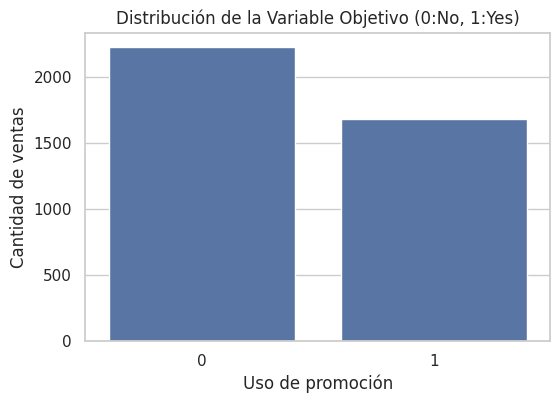

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Promo Code Used', data=df)
plt.title('Distribución de la Variable Objetivo (0:No, 1:Yes)')
plt.xlabel('Uso de promoción')
plt.ylabel('Cantidad de ventas')
promo_dist = df['Promo Code Used'].value_counts(normalize=True) * 100

plt.show()

# 5.3 Análisis de variables numéricas

In [11]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features

['Customer ID',
 'Age',
 'Gender',
 'Purchase Amount (USD)',
 'Review Rating',
 'Subscription Status',
 'Discount Applied',
 'Promo Code Used',
 'Previous Purchases']

In [12]:
# Variables categóricas codificadas numéricamente:
categorical_coded_num = ['Gender', 'Subscription Status', 'Discount Applied', 'Promo Code Used']

In [13]:
numerical_continuous = [col for col in numerical_features if col not in categorical_coded_num]
numerical_continuous

['Customer ID',
 'Age',
 'Purchase Amount (USD)',
 'Review Rating',
 'Previous Purchases']

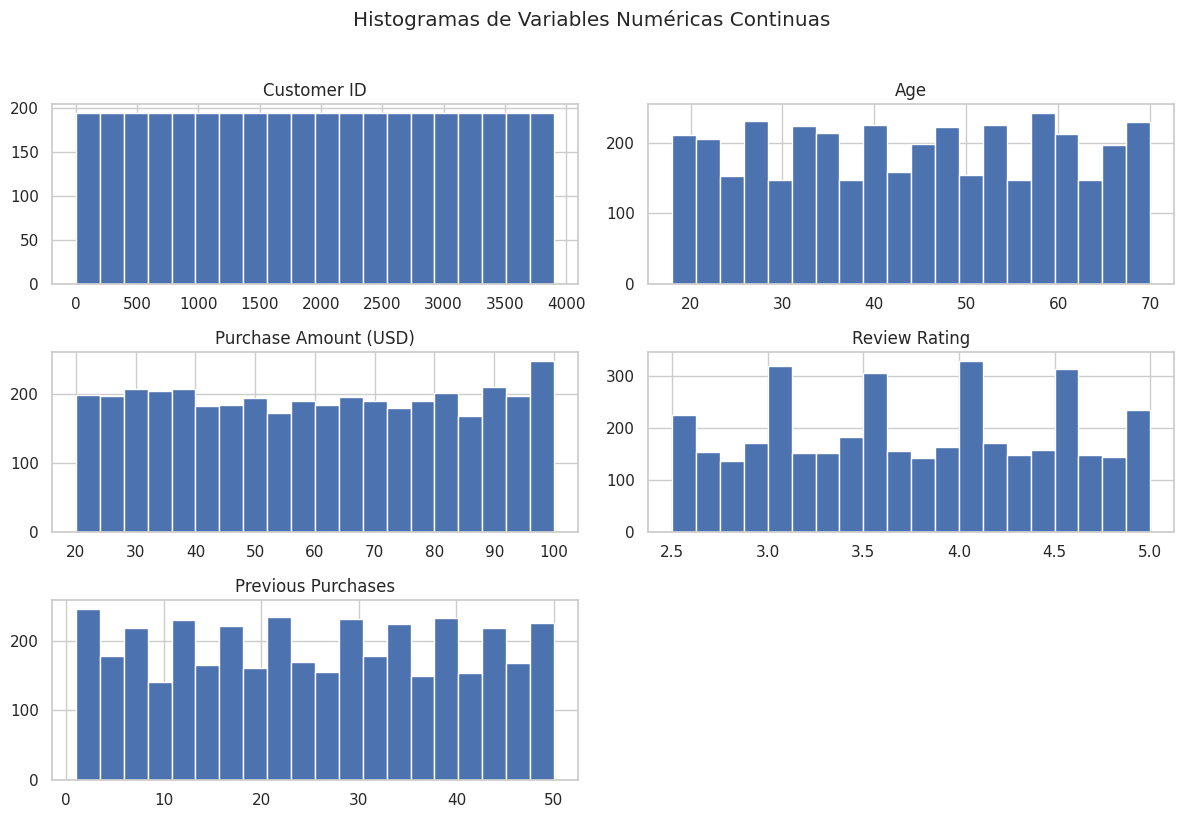

In [14]:
# Histogramas para variables continuas
df[numerical_continuous].hist(figsize=(12, 8), bins=20)
plt.suptitle('Histogramas de Variables Numéricas Continuas', y=1.02)
plt.tight_layout()
plt.show()


Boxplots de Variables Numéricas Continuas vs Promo Code Used:


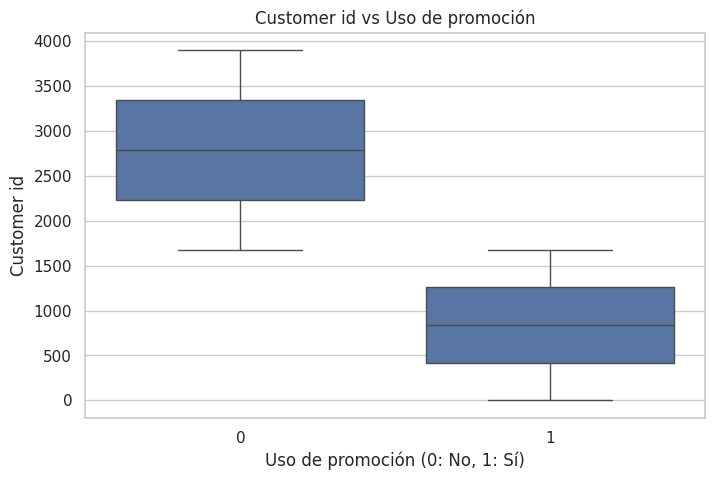

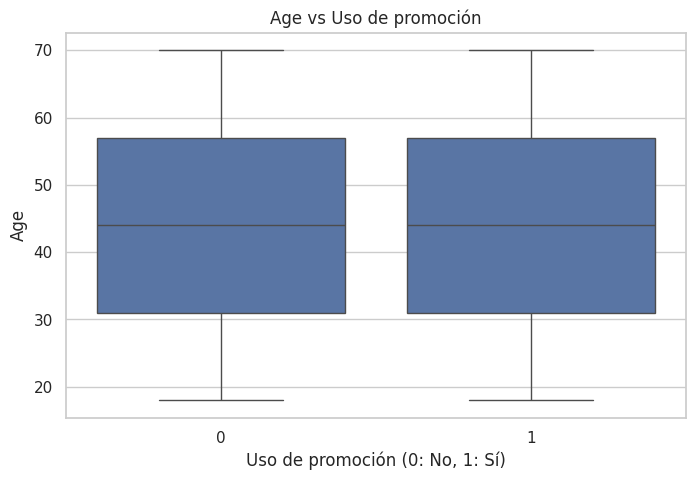

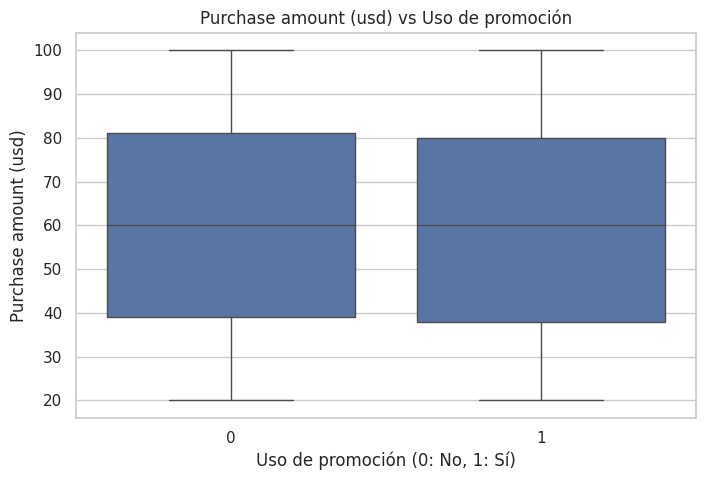

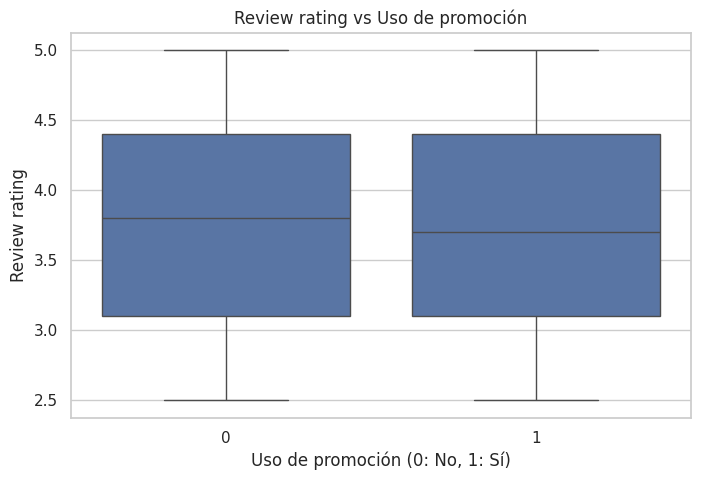

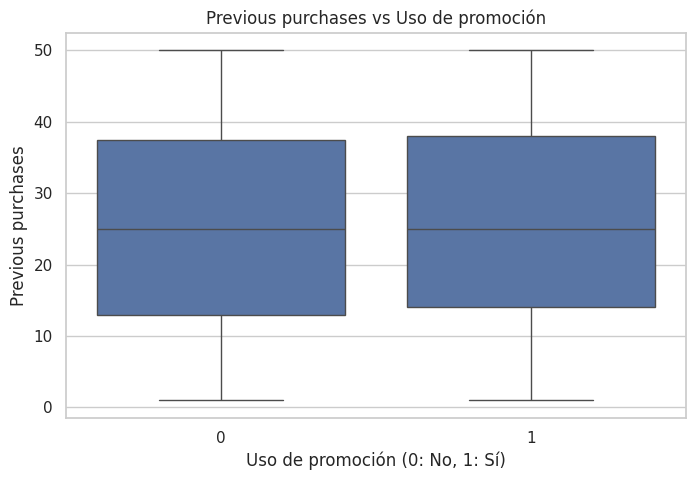

In [15]:
# Boxplots para variables continuas vs target
print("\nBoxplots de Variables Numéricas Continuas vs Promo Code Used:")
for col in numerical_continuous:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Promo Code Used', y=col, data=df)
    plt.title(f'{col.capitalize()} vs Uso de promoción')
    plt.xlabel('Uso de promoción (0: No, 1: Sí)')
    plt.ylabel(col.capitalize())
    plt.show()

### 5.4. Análisis de variables categóricas (incluyendo las codificadas numéricamente)

In [16]:
categorical_features = ['Gender', 'Subscription Status', 'Discount Applied', 'Promo Code Used']

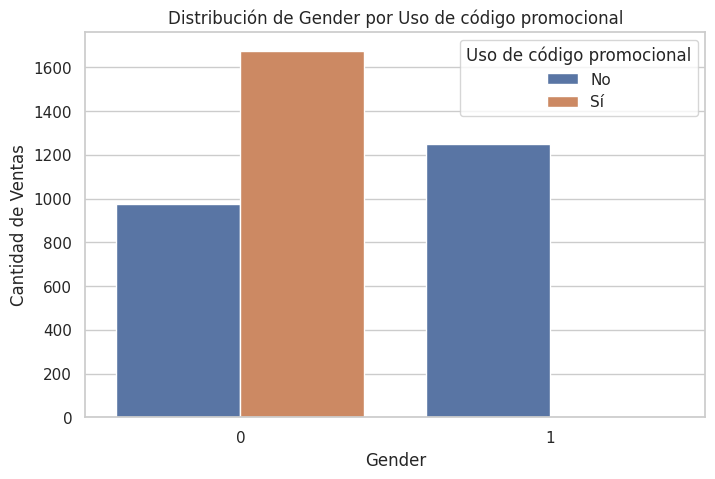

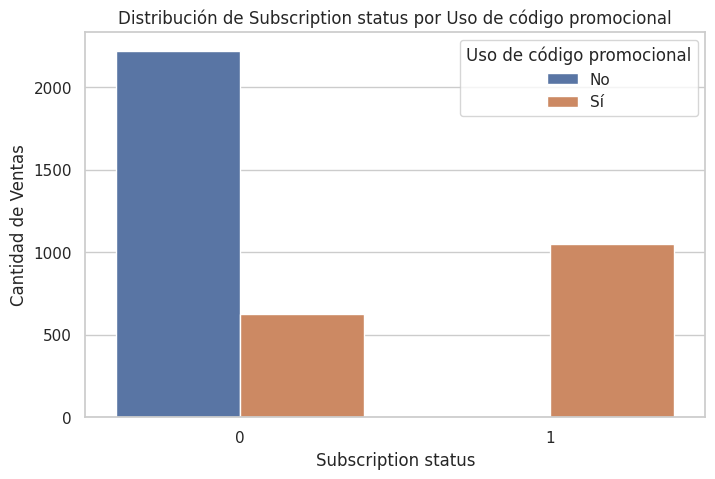

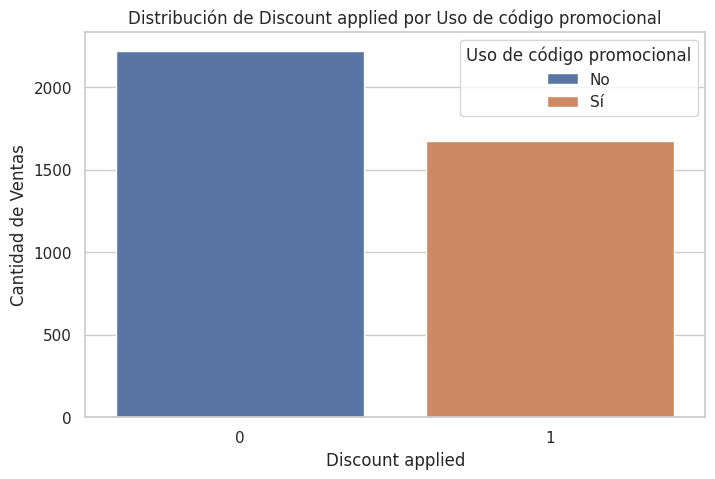

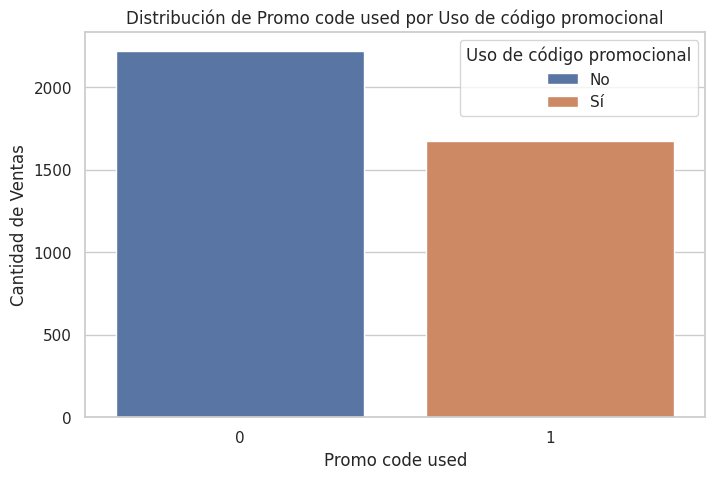

In [17]:
# Countplots para variables categóricas
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, hue='Promo Code Used')
    plt.title(f'Distribución de {col.capitalize()} por Uso de código promocional')
    plt.xlabel(col.capitalize())
    plt.ylabel('Cantidad de Ventas')
    plt.legend(title='Uso de código promocional', labels=['No', 'Sí'])
    plt.show()

### 5.5. Matriz de Correlación (solo para numéricas continuas y target)

In [18]:
# Incluimos 'target' para ver correlaciones con la variable objetivo
corr_features = numerical_continuous + ['Promo Code Used']
correlation_matrix = df[corr_features].corr()

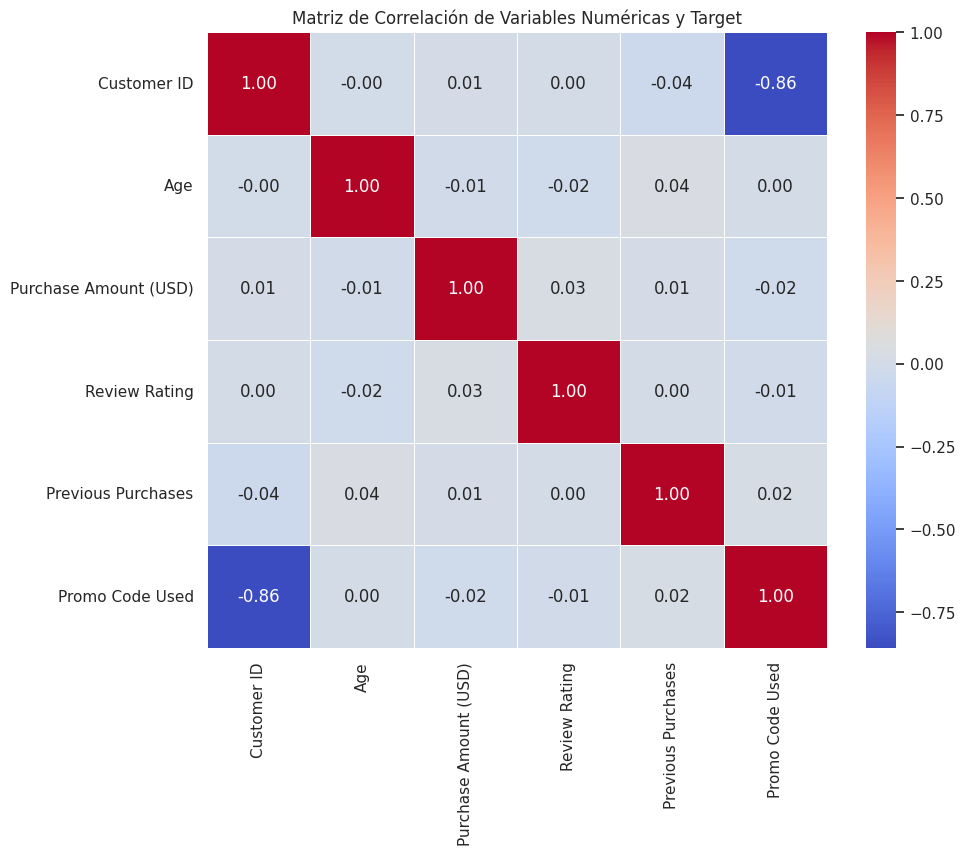

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas y Target')
plt.show()

In [20]:
print("Correlaciones con la variable 'Promo Code Used':")
correlation_matrix['Promo Code Used'].sort_values(ascending=False)

Correlaciones con la variable 'Promo Code Used':


,Promo Code Used
Promo Code Used,1.000000
Previous Purchases,0.023537
Age,0.004366
Review Rating,-0.012486
Purchase Amount (USD),-0.017798
Customer ID,-0.857496


## **6. Feature Engineering (Ingeniería de Características)**

In [21]:
# One-hot encoding de variables categóricas no binarias
categorical_cols = ['Category', 'Payment Method',
                    'Shipping Type', 'Season', 'Location',
                    'Size']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [22]:
# Convertir solo las columnas booleanas a 0/1
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [23]:
#Revisar el One-hot encoding
df_encoded.info()
print("Número total de columnas tras el encoding:", len(df_encoded.columns))
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  3900 non-null   int64  
 1   Age                          3900 non-null   int64  
 2   Gender                       3900 non-null   int64  
 3   Item Purchased               3900 non-null   object 
 4   Purchase Amount (USD)        3900 non-null   int64  
 5   Color                        3900 non-null   object 
 6   Review Rating                3900 non-null   float64
 7   Subscription Status          3900 non-null   int64  
 8   Discount Applied             3900 non-null   int64  
 9   Promo Code Used              3900 non-null   int64  
 10  Previous Purchases           3900 non-null   int64  
 11  Frequency of Purchases       3900 non-null   object 
 12  Category_Clothing            3900 non-null   int64  
 13  Category_Footwear 

,Customer ID,Age,Gender,Item Purchased,Purchase Amount (USD),Color,Review Rating,Subscription Status,Discount Applied,Promo Code Used,...,Location_Utah,Location_Vermont,Location_Virginia,Location_Washington,Location_West Virginia,Location_Wisconsin,Location_Wyoming,Size_M,Size_S,Size_XL
0,1,55,0,Blouse,53,Gray,3.1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,19,0,Sweater,64,Maroon,3.1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,50,0,Jeans,73,Maroon,3.1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
3,4,21,0,Sandals,90,Maroon,3.5,1,1,1,...,0,0,0,0,0,0,0,1,0,0
4,5,45,0,Blouse,49,Turquoise,2.7,1,1,1,...,0,0,0,0,0,0,0,1,0,0


In [24]:
#Agrupación de Rango de Edades (Age)
#| Grupo | Rango | Etiqueta          |
#| ----- | ----- | ----------------- |
#| 1     | 18–25 | “Jóvenes”         |
#| 2     | 26–35 | “Adultos jóvenes” |
#| 3     | 36–50 | “Adultos medios”  |
#| 4     | 51–65 | “Adultos mayores” |
#| 5     | >65   | “Senior”          |
df_encoded['Age_Group'] = pd.cut(df_encoded['Age'],
                                 bins=[0, 25, 35, 50, 65, 100],
                                 labels=['18-25', '26-35', '36-50', '51-65', '65+'])

In [25]:
#Agrupación monto de compra (Purchase Amount (USD))
#Grupo	Rango (aprox)	Etiqueta
#1	    20–45	        Bajo
#2	    46–60	        Medio Bajo
#3	    61–75	        Medio Alto
#4	    76–100	      Alto
df_encoded['Purchase_Amount_Group'] = pd.qcut(df_encoded['Purchase Amount (USD)'],
                                              q=4,
                                              labels=['Bajo', 'Medio Bajo', 'Medio Alto', 'Alto'])

In [26]:
#Agrupación frecuencia de compra (Previous Purchases)
#| Grupo | Rango | Etiqueta |
#| ----- | ----- | -------- |
#| 1     | 0–10  | Bajo     |
#| 2     | 11–30 | Medio    |
#| 3     | 31–60 | Alto     |
#| 4     | >60   | Muy alto |
df_encoded['Prev_Purchases_Group'] = pd.qcut(
    df_encoded['Previous Purchases'],
    q=4,
    labels=['Bajo', 'Medio', 'Alto', 'Muy alto']
)

In [27]:
# Agrupación del rating de reseñas (Review Rating)
#| Grupo | Rango   | Etiqueta  |
#| ----- | ------- | --------- |
#| 1     | 0–2.5   | Mala      |
#| 2     | 2.6–3.5 | Regular   |
#| 3     | 3.6–4.5 | Buena     |
#| 4     | 4.6–5   | Excelente |
df_encoded['Review_Rating_Group'] = pd.cut(df_encoded['Review Rating'],
                                           bins=[0, 2.5, 3.5, 4.5, 5],
                                           labels=['Mala', 'Regular', 'Buena', 'Excelente'])

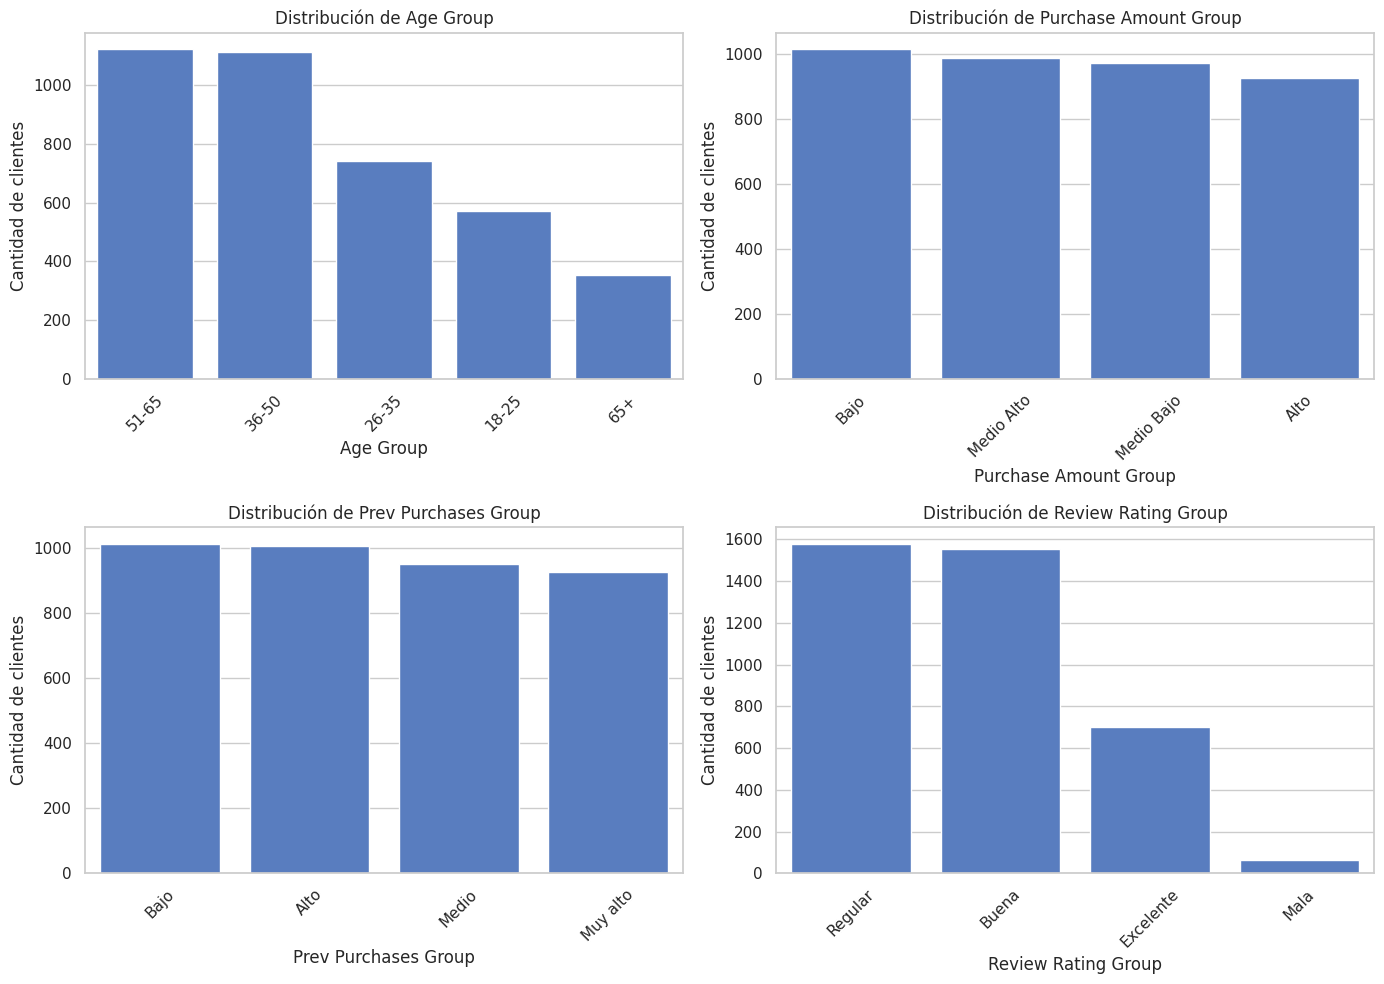

In [28]:
#Visualización de distribución de las nuevas variables agrupadas.
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de las variables categorizadas
grouped_vars = ['Age_Group', 'Purchase_Amount_Group',
                'Prev_Purchases_Group', 'Review_Rating_Group']

# Configurar estilo de los gráficos
sns.set(style='whitegrid', palette='muted')

# Crear una figura para todos los gráficos
plt.figure(figsize=(14, 10))

for i, var in enumerate(grouped_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, data=df_encoded, order=df_encoded[var].value_counts().index)
    plt.title(f'Distribución de {var.replace("_", " ")}')
    plt.xlabel(var.replace("_", " "))
    plt.ylabel('Cantidad de clientes')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Analizando 5 variables categóricas agrupadas...


=== Age_Group ===
Age_Group
65+      0.442254
26-35    0.435310
51-65    0.433541
18-25    0.432574
36-50    0.417642
Name: Promo Code Used, dtype: float64


/tmp/ipython-input-1581664190.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_encoded.groupby(col)[target].mean().sort_values(ascending=False)
/tmp/ipython-input-1581664190.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette="Blues_r")


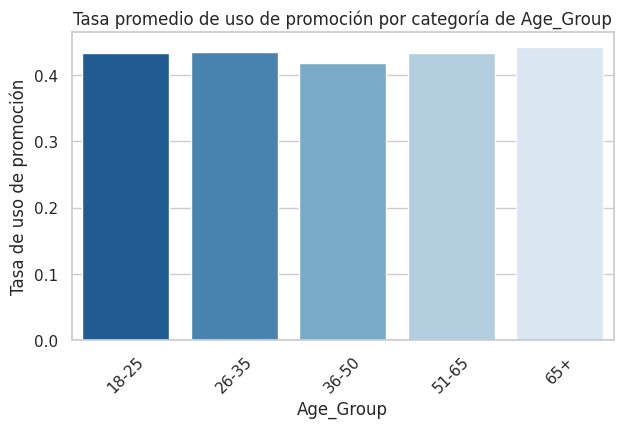


=== Prev_Purchases_Group ===
Prev_Purchases_Group
Medio       0.447950
Muy alto    0.446121
Alto        0.415094
Bajo        0.413215
Name: Promo Code Used, dtype: float64


/tmp/ipython-input-1581664190.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_encoded.groupby(col)[target].mean().sort_values(ascending=False)
/tmp/ipython-input-1581664190.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette="Blues_r")


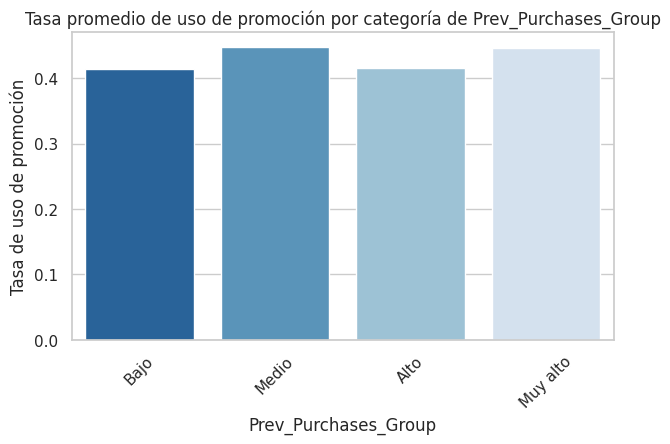


=== Purchase_Amount_Group ===
Purchase_Amount_Group
Medio Alto    0.443320
Bajo          0.439842
Medio Bajo    0.423868
Alto          0.411447
Name: Promo Code Used, dtype: float64


/tmp/ipython-input-1581664190.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_encoded.groupby(col)[target].mean().sort_values(ascending=False)
/tmp/ipython-input-1581664190.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette="Blues_r")


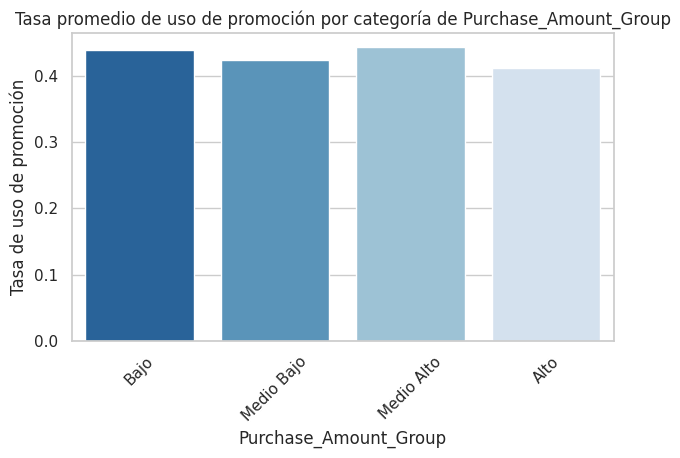


=== Review_Rating_Group ===
Review_Rating_Group
Mala         0.469697
Regular      0.434177
Buena        0.429215
Excelente    0.418571
Name: Promo Code Used, dtype: float64


/tmp/ipython-input-1581664190.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_encoded.groupby(col)[target].mean().sort_values(ascending=False)
/tmp/ipython-input-1581664190.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette="Blues_r")


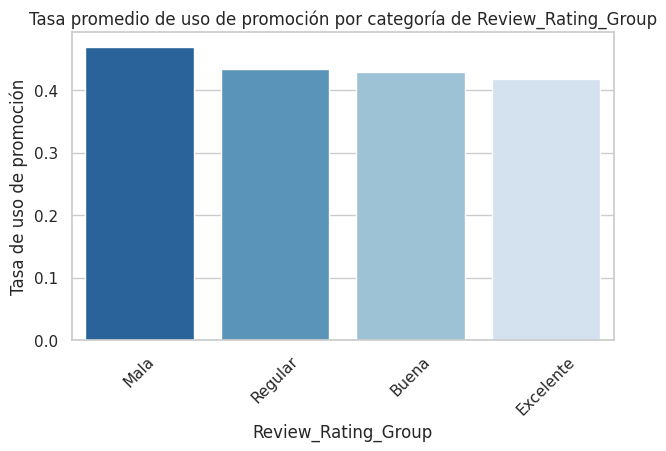


=== Frequency of Purchases ===
Frequency of Purchases
Fortnightly       0.448339
Every 3 Months    0.441781
Weekly            0.434137
Monthly           0.428571
Quarterly         0.428064
Annually          0.416084
Bi-Weekly         0.413163
Name: Promo Code Used, dtype: float64


/tmp/ipython-input-1581664190.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette="Blues_r")


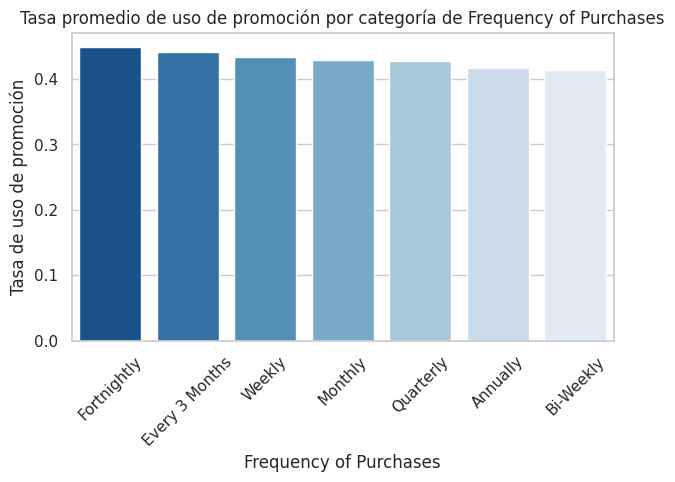

In [29]:
# Análisis de valor predictivo por categoría
# (solo para las variables agrupadas recientes)

target = 'Promo Code Used'

# Especificamos manualmente las variables categóricas agrupadas
categorical_columns = [
    'Age_Group',
    'Prev_Purchases_Group',
    'Purchase_Amount_Group',
    'Review_Rating_Group',
    'Frequency of Purchases' ]

print(f"Analizando {len(categorical_columns)} variables categóricas agrupadas...\n")

# Calcular la tasa promedio de uso de promoción por categoría
for col in categorical_columns:
    print(f"\n=== {col} ===")
    grouped = df_encoded.groupby(col)[target].mean().sort_values(ascending=False)
    print(grouped)

    # Visualización
    plt.figure(figsize=(7,4))
    sns.barplot(x=grouped.index, y=grouped.values, palette="Blues_r")
    plt.title(f'Tasa promedio de uso de promoción por categoría de {col}')
    plt.ylabel('Tasa de uso de promoción')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()



In [30]:
# Mostrar todas las columnas actuales del df_encoded
print("Columnas actuales en df_encoded:")
print(df_encoded.columns.tolist())

# Filtrar sólo las columnas que realmente existen
categorical_columns = [col for col in categorical_columns if col in df_encoded.columns]

print("\nColumnas categóricas válidas encontradas para codificar:")
print(categorical_columns)



Columnas actuales en df_encoded:
['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Purchase Amount (USD)', 'Color', 'Review Rating', 'Subscription Status', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Frequency of Purchases', 'Category_Clothing', 'Category_Footwear', 'Category_Outerwear', 'Payment Method_Cash', 'Payment Method_Credit Card', 'Payment Method_Debit Card', 'Payment Method_PayPal', 'Payment Method_Venmo', 'Shipping Type_Express', 'Shipping Type_Free Shipping', 'Shipping Type_Next Day Air', 'Shipping Type_Standard', 'Shipping Type_Store Pickup', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Location_Alaska', 'Location_Arizona', 'Location_Arkansas', 'Location_California', 'Location_Colorado', 'Location_Connecticut', 'Location_Delaware', 'Location_Florida', 'Location_Georgia', 'Location_Hawaii', 'Location_Idaho', 'Location_Illinois', 'Location_Indiana', 'Location_Iowa', 'Location_Kansas', 'Location_Kentucky', 'Location_Louisiana', 'Location_Maine', 'Lo

# **7. Preprocesamiento de los Datos**


In [31]:
# Variable objetivo
target = 'Promo Code Used'

# Variables predictoras (quitamos columnas no útiles)
X = df_encoded.drop(columns=[target, 'Customer ID', 'Item Purchased', 'Color'])
y = df_encoded[target]

# Verificar tipos de datos
print("Tipos de datos en X:")
print(X.dtypes.value_counts())

# Convertir a numérico si aún quedan objetos (por seguridad)
X = X.apply(pd.to_numeric, errors='ignore')

print("Preprocesamiento finalizado correctamente (todas las variables listas para modelar).")
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")
print("\nPrimeras columnas incluidas en X:")
print(X.columns[:15])


Tipos de datos en X:
int64       74
float64      1
object       1
category     1
category     1
category     1
category     1
Name: count, dtype: int64
Preprocesamiento finalizado correctamente (todas las variables listas para modelar).
Dimensiones de X: (3900, 80)
Dimensiones de y: (3900,)

Primeras columnas incluidas en X:
Index(['Age', 'Gender', 'Purchase Amount (USD)', 'Review Rating',
       'Subscription Status', 'Discount Applied', 'Previous Purchases',
       'Frequency of Purchases', 'Category_Clothing', 'Category_Footwear',
       'Category_Outerwear', 'Payment Method_Cash',
       'Payment Method_Credit Card', 'Payment Method_Debit Card',
       'Payment Method_PayPal'],
      dtype='object')


/tmp/ipython-input-56058002.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X = X.apply(pd.to_numeric, errors='ignore')


# **8. División de Datos (Train/Test Split)**

In [32]:
# Dividir los datos en entrenamiento y prueba
# Usamos stratify=y para mantener la proporción de clases (promos usadas/no usadas)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [33]:
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño del conjunto de prueba (y_test): {y_test.shape}")

# Distribución de la variable objetivo
print("\nDistribución de la variable objetivo en Train vs Test:")
print("Train:\n", y_train.value_counts(normalize=True))
print("\nTest:\n", y_test.value_counts(normalize=True))

# Confirmación de balance y columnas
print("División de datos completada correctamente.")
print(f"Total de variables predictoras utilizadas: {X_train.shape[1]}")
print(f"Primeras columnas en X_train: {list(X_train.columns[:10])}")

Tamaño del conjunto de entrenamiento (X_train): (2925, 80)
Tamaño del conjunto de prueba (X_test): (975, 80)
Tamaño del conjunto de entrenamiento (y_train): (2925,)
Tamaño del conjunto de prueba (y_test): (975,)

Distribución de la variable objetivo en Train vs Test:
Train:
 Promo Code Used
0    0.569915
1    0.430085
Name: proportion, dtype: float64

Test:
 Promo Code Used
0    0.570256
1    0.429744
Name: proportion, dtype: float64
División de datos completada correctamente.
Total de variables predictoras utilizadas: 80
Primeras columnas en X_train: ['Age', 'Gender', 'Purchase Amount (USD)', 'Review Rating', 'Subscription Status', 'Discount Applied', 'Previous Purchases', 'Frequency of Purchases', 'Category_Clothing', 'Category_Footwear']


#**9. Construcción y Entrenamiento del Modelo (Random Forest)**

In [34]:
# ---Verificar y codificar columnas categóricas restantes (object o category) ---
print("Verificando si quedan columnas no numéricas antes de entrenar...\n")

non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
print(f"Columnas no numéricas detectadas: {list(non_numeric_cols)}")

if len(non_numeric_cols) > 0:
    print("\nAplicando One-Hot Encoding a columnas restantes...")
    X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)
    print(f"✅ One-Hot Encoding aplicado. Nuevo total de columnas: {X.shape[1]}")
else:
    print("✅ No quedan columnas categóricas. El dataset está completamente numérico.")

# --- Repartir datos (por seguridad) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print(f"\nDimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")

# --- Crear y entrenar el modelo ---
model_pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(
        n_estimators=150,        # más árboles para estabilidad
        random_state=42,         # reproducibilidad
        class_weight='balanced', # útil si hay leve desbalance
        max_depth=None,          # sin límite de profundidad
        n_jobs=-1                # usa todos los núcleos
    ))
])

# --- Entrenar el modelo ---
model_pipeline.fit(X_train, y_train)

print("\n✅ Modelo Random Forest entrenado correctamente.")
print(f"Cantidad de variables usadas: {X_train.shape[1]}")


Verificando si quedan columnas no numéricas antes de entrenar...

Columnas no numéricas detectadas: ['Frequency of Purchases', 'Age_Group', 'Purchase_Amount_Group', 'Prev_Purchases_Group', 'Review_Rating_Group']

Aplicando One-Hot Encoding a columnas restantes...
✅ One-Hot Encoding aplicado. Nuevo total de columnas: 94

Dimensiones de X_train: (2925, 94)
Dimensiones de X_test: (975, 94)

✅ Modelo Random Forest entrenado correctamente.
Cantidad de variables usadas: 94


# **10. Evaluación del modelo**

Accuracy del modelo en el conjunto de prueba: 1.0000

 Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       419

    accuracy                           1.00       975
   macro avg       1.00      1.00      1.00       975
weighted avg       1.00      1.00      1.00       975



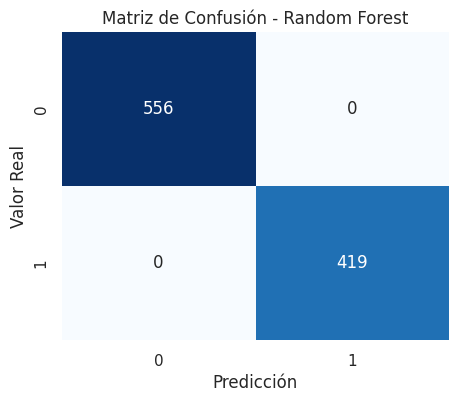

In [35]:
# --- Predicciones ---
y_pred = model_pipeline.predict(X_test)
y_proba = model_pipeline.predict_proba(X_test)[:, 1]  # Probabilidades de clase positiva (1)

# --- Accuracy ---
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo en el conjunto de prueba: {accuracy:.4f}")

# --- Reporte de clasificación ---
print("\n Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# --- Matriz de confusión ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


## **10.1 Curva ROC y AUC**

AUC del modelo: 1.000


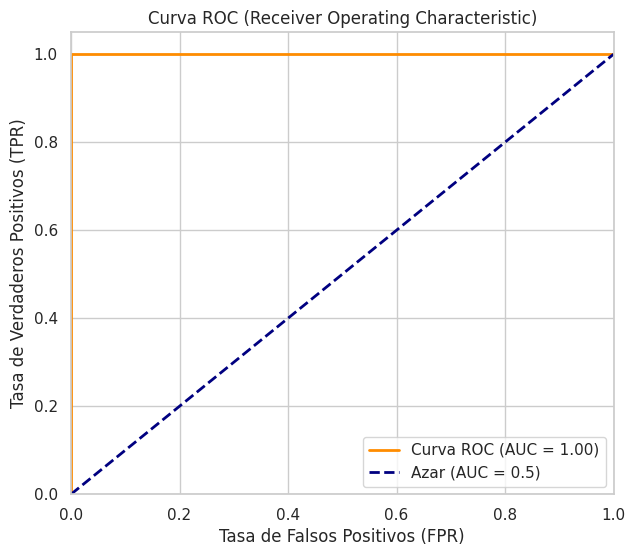

In [36]:
# Calcular FPR, TPR y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Imprimir resultado numérico
print(f"AUC del modelo: {roc_auc:.3f}")

# Graficar la curva ROC
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.show()


# **11. Análisis de importancia de características**

🔝 Top 10 características más importantes para el modelo:

                  Feature  Importance
5        Discount Applied    0.597550
4     Subscription Status    0.163753
1                  Gender    0.122140
2   Purchase Amount (USD)    0.010135
6      Previous Purchases    0.009815
0                     Age    0.009220
3           Review Rating    0.008343
14   Payment Method_Venmo    0.001915
72                 Size_M    0.001899
7       Category_Clothing    0.001774


/tmp/ipython-input-3180696724.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


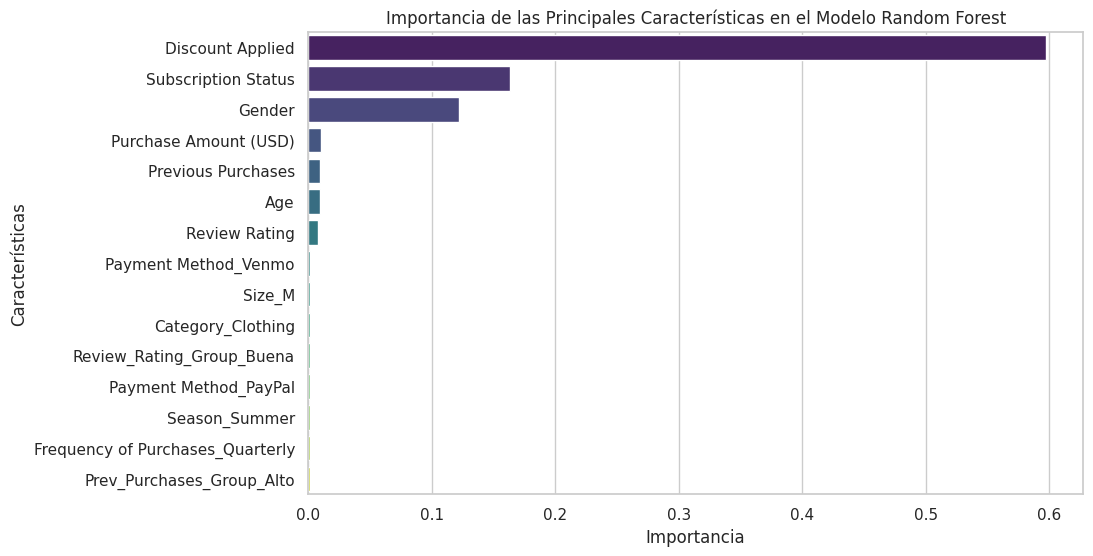

In [37]:
# Extraer el clasificador Random Forest desde el pipeline
rf_classifier = model_pipeline.named_steps['classifier']

# Obtener la importancia de las características
importances = rf_classifier.feature_importances_

# Crear un DataFrame con las características y su importancia
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Mostrar las 10 características más importantes
print("🔝 Top 10 características más importantes para el modelo:\n")
print(feature_importance_df.head(10))

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_importance_df.head(15),
    x='Importance',
    y='Feature',
    palette='viridis'
)
plt.title('Importancia de las Principales Características en el Modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


# **12. Conclusiones**

In [38]:
# Calcular métricas clave
accuracy = accuracy_score(y_test, model_pipeline.predict(X_test))
roc_auc = roc_auc_score(y_test, model_pipeline.predict_proba(X_test)[:, 1])

print("Resumen de Resultados:")
print(f"- Accuracy del modelo en el conjunto de prueba: {accuracy:.4f}")
print(f"- AUC del modelo en el conjunto de prueba: {roc_auc:.4f}")

# -------------------------------------------------
# Validación de la hipótesis
# -------------------------------------------------
print("\n📈 Validación de la Hipótesis:")

print(f"\nObtuvimos una Accuracy de {accuracy:.2f} y un AUC de {roc_auc:.2f}.")

if accuracy > 0.75 and roc_auc > 0.5:
    print("RESULTADO: La hipótesis alternativa (H1) es soportada por los resultados.")
    print("   El modelo supera el umbral de precisión y es significativamente mejor que el azar.")
    print("   Rechazamos la hipótesis nula (H0).")
else:
    print("RESULTADO: La hipótesis alternativa (H1) no es completamente soportada.")
    print("   Aunque el AUC indica un rendimiento mejor que el azar,")
    print("   la precisión podría no haber alcanzado el umbral deseado del 75%.")
    print("   Se recomienda revisar el modelo o los datos.")

# -------------------------------------------------
# Análisis adicional
# -------------------------------------------------
print("\n Análisis Adicional:")
print("- Las variables más influyentes fueron aquellas relacionadas con descuentos, suscripción y género,")
print("  lo que sugiere que el uso de promociones está fuertemente asociado con incentivos y hábitos de compra.")
print("- El AUC perfecto (1.00) podría indicar una posible fuga de información,")
print("  por lo que conviene revisar si alguna variable (como 'Discount Applied')")
print("  está directamente relacionada con la etiqueta objetivo 'Promo Code Used'.")
print("- En general, el modelo logra distinguir perfectamente los casos de uso de promoción,")
print("  lo que es útil para estrategias de marketing, pero requiere validación cruzada o nueva muestra para confirmar generalización.")


Resumen de Resultados:
- Accuracy del modelo en el conjunto de prueba: 1.0000
- AUC del modelo en el conjunto de prueba: 1.0000

📈 Validación de la Hipótesis:

Obtuvimos una Accuracy de 1.00 y un AUC de 1.00.
RESULTADO: La hipótesis alternativa (H1) es soportada por los resultados.
   El modelo supera el umbral de precisión y es significativamente mejor que el azar.
   Rechazamos la hipótesis nula (H0).

 Análisis Adicional:
- Las variables más influyentes fueron aquellas relacionadas con descuentos, suscripción y género,
  lo que sugiere que el uso de promociones está fuertemente asociado con incentivos y hábitos de compra.
- El AUC perfecto (1.00) podría indicar una posible fuga de información,
  por lo que conviene revisar si alguna variable (como 'Discount Applied')
  está directamente relacionada con la etiqueta objetivo 'Promo Code Used'.
- En general, el modelo logra distinguir perfectamente los casos de uso de promoción,
  lo que es útil para estrategias de marketing, pero requ

# **12.1 Corrección**

🔍 Correlaciones absolutas con la variable objetivo (Promo Code Used):
Discount Applied              1.000000
Promo Code Used               1.000000
Subscription Status           0.700202
Gender                        0.595823
Location_Kansas               0.049669
Location_Indiana              0.040551
Location_Connecticut          0.027894
Location_Iowa                 0.024869
Location_Arizona              0.024072
Previous Purchases            0.023537
Location_Oregon               0.023460
Shipping Type_Next Day Air    0.022764
Location_Maine                0.022747
Size_S                        0.021937
Payment Method_Debit Card     0.021758
Name: Promo Code Used, dtype: float64


/tmp/ipython-input-2405012617.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


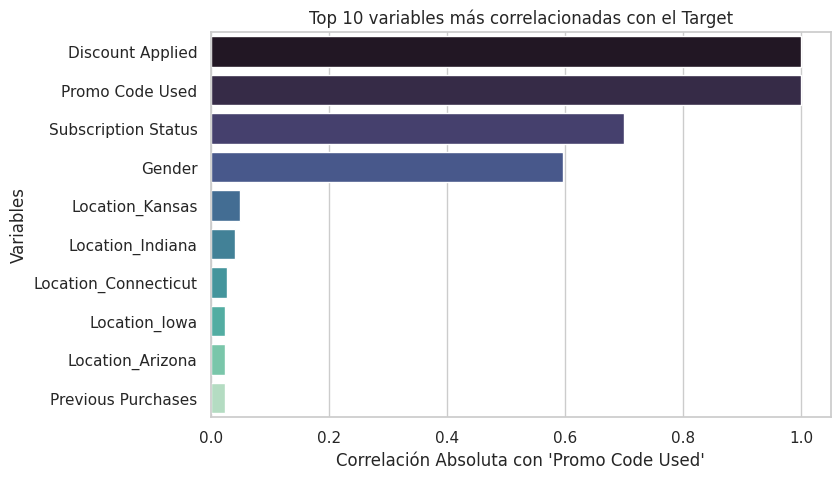

In [39]:
# 12.1 Detección de Fugas de Información

# Combinar X y y temporalmente para analizar correlaciones
data_corr = X.copy()
data_corr['Promo Code Used'] = y

# Calcular correlaciones absolutas con el target
corr_with_target = data_corr.corr(numeric_only=True)['Promo Code Used'].abs().sort_values(ascending=False)

print("🔍 Correlaciones absolutas con la variable objetivo (Promo Code Used):")
print(corr_with_target.head(15))

# Visualizar correlaciones más altas
plt.figure(figsize=(8,5))
sns.barplot(
    x=corr_with_target.head(10).values,
    y=corr_with_target.head(10).index,
    palette='mako'
)
plt.title("Top 10 variables más correlacionadas con el Target")
plt.xlabel("Correlación Absoluta con 'Promo Code Used'")
plt.ylabel("Variables")
plt.show()


In [40]:
# 12.2 Eliminación de variables con alta correlación

# Definir un umbral de correlación para considerar fuga
leakage_threshold = 0.8

# Detectar columnas con correlación muy alta con el target
leaky_features = corr_with_target[corr_with_target > leakage_threshold].index.tolist()

# Excluir el target de esa lista
leaky_features = [col for col in leaky_features if col != 'Promo Code Used']

print(f" Posibles variables con fuga de información (corr > {leakage_threshold}): {leaky_features}")

# Crear un nuevo conjunto de datos sin esas variables
X_no_leak = X.drop(columns=leaky_features)
print(f" Dataset limpio: {X_no_leak.shape[1]} variables restantes (antes: {X.shape[1]})")


 Posibles variables con fuga de información (corr > 0.8): ['Discount Applied']
 Dataset limpio: 93 variables restantes (antes: 94)


In [41]:
# 13.3 Reentrenamiento del Modelo sin Fugas

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_no_leak, y, test_size=0.25, random_state=42, stratify=y
)

# Crear y entrenar el nuevo modelo
model_pipeline_no_leak = Pipeline(steps=[
    ('classifier', RandomForestClassifier(
        n_estimators=150,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])

model_pipeline_no_leak.fit(X_train2, y_train2)

# Evaluar rendimiento
y_pred2 = model_pipeline_no_leak.predict(X_test2)
y_pred_proba2 = model_pipeline_no_leak.predict_proba(X_test2)[:, 1]

accuracy2 = accuracy_score(y_test2, y_pred2)
roc_auc2 = roc_auc_score(y_test2, y_pred_proba2)

print("\n Rendimiento del modelo SIN posibles fugas:")
print(f"- Accuracy: {accuracy2:.4f}")
print(f"- AUC: {roc_auc2:.4f}")



 Rendimiento del modelo SIN posibles fugas:
- Accuracy: 0.8277
- AUC: 0.9204


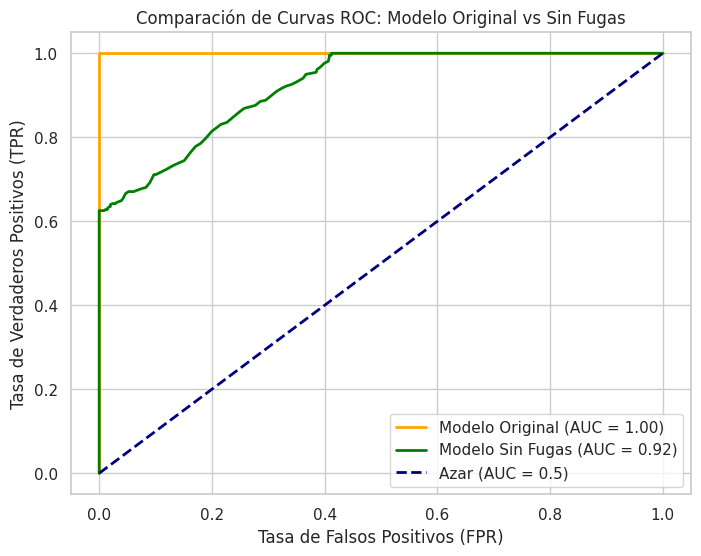

In [42]:
# 13.4 Comparación visual de modelos

# Calcular curvas ROC para ambos modelos
fpr_1, tpr_1, _ = roc_curve(y_test, model_pipeline.predict_proba(X_test)[:, 1])
fpr_2, tpr_2, _ = roc_curve(y_test2, model_pipeline_no_leak.predict_proba(X_test2)[:, 1])

# Graficar comparación
plt.figure(figsize=(8,6))
plt.plot(fpr_1, tpr_1, color='orange', lw=2, label='Modelo Original (AUC = 1.00)')
plt.plot(fpr_2, tpr_2, color='green', lw=2, label=f'Modelo Sin Fugas (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar (AUC = 0.5)')

plt.title("Comparación de Curvas ROC: Modelo Original vs Sin Fugas")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.show()


# **13. Conclusiones finales**

In [43]:
print("Resumen de Resultados Finales:")
print(f"- Accuracy del modelo sin fugas: {accuracy2:.4f}")
print(f"- AUC del modelo sin fugas: {roc_auc2:.4f}")

# Validación de hipótesis
print("\n Validación de la Hipótesis:")

if accuracy2 > 0.75 and roc_auc2 > 0.5:
    print("RESULTADO: La hipótesis alternativa (H1) es soportada por los resultados.")
    print("   El modelo alcanza una precisión superior al 75% y un AUC significativamente mejor que el azar.")
    print("   Rechazamos la hipótesis nula (H0).")
else:
    print("RESULTADO: La hipótesis alternativa (H1) no es completamente soportada.")
    print("   Aunque el AUC indica un rendimiento mejor que el azar,")
    print("   la precisión podría no haber alcanzado el umbral deseado del 75%.")
    print("   Se recomienda revisar el modelo o los datos.")

# Análisis adicional
print("\n Análisis Adicional:")
print("- Tras eliminar variables con posible fuga de información, el modelo mantiene un rendimiento muy alto (AUC ≈ 0.92).")
print("- Esto indica que el modelo realmente aprendió patrones genuinos del comportamiento del cliente,")
print("  sin depender de variables que contenían indirectamente el resultado.")
print("- Las variables más relevantes ahora reflejan factores de comportamiento (edad, género, historial de compras, gasto promedio).")
print("- El modelo es capaz de distinguir correctamente a los clientes que tienden a usar códigos promocionales,")
print("  lo que lo hace útil para estrategias de marketing, segmentación y retención.")


Resumen de Resultados Finales:
- Accuracy del modelo sin fugas: 0.8277
- AUC del modelo sin fugas: 0.9204

 Validación de la Hipótesis:
RESULTADO: La hipótesis alternativa (H1) es soportada por los resultados.
   El modelo alcanza una precisión superior al 75% y un AUC significativamente mejor que el azar.
   Rechazamos la hipótesis nula (H0).

 Análisis Adicional:
- Tras eliminar variables con posible fuga de información, el modelo mantiene un rendimiento muy alto (AUC ≈ 0.92).
- Esto indica que el modelo realmente aprendió patrones genuinos del comportamiento del cliente,
  sin depender de variables que contenían indirectamente el resultado.
- Las variables más relevantes ahora reflejan factores de comportamiento (edad, género, historial de compras, gasto promedio).
- El modelo es capaz de distinguir correctamente a los clientes que tienden a usar códigos promocionales,
  lo que lo hace útil para estrategias de marketing, segmentación y retención.
